In [3]:
from sigvisa.plotting.event_heatmap import EventHeatmap
from sigvisa  import Sigvisa

from sigvisa.database.dataset import read_events

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
s = Sigvisa()
cursor = s.dbconn.cursor()

st1 = 1167609600
et1 = 1199145600
events1 = read_events(cursor, st1, et1, "isc")[0]
st2 = 1203603300
et2 = 1203624962
events2 = read_events(cursor, st2, et2, "isc")[0]
train_events = np.vstack((events1, events2))

In [5]:

st1 = 1203624962
et1 = 1203646562
events1 = read_events(cursor, st1, et1, "isc")[0]
st2 = 1199145600
et2 = 1203603300
events2 = read_events(cursor, st2, et2, "isc")[0]
validation_events = np.vstack((events1, events2))

In [6]:
def prior_lp(lon, lat):
    lp = s.sigmodel.event_location_prior_logprob(lon, lat, -1)
    if lp < -20:
        lp = s.sigmodel.event_location_prior_logprob(-101, 48, -1)
    return lp

def prior_prob(lon, lat):
    return np.exp(prior_lp(lon, lat))

In [7]:
print "validation lp", np.mean([prior_lp(l[0], l[1]) for l in validation_events])

validation lp 0.910292450055


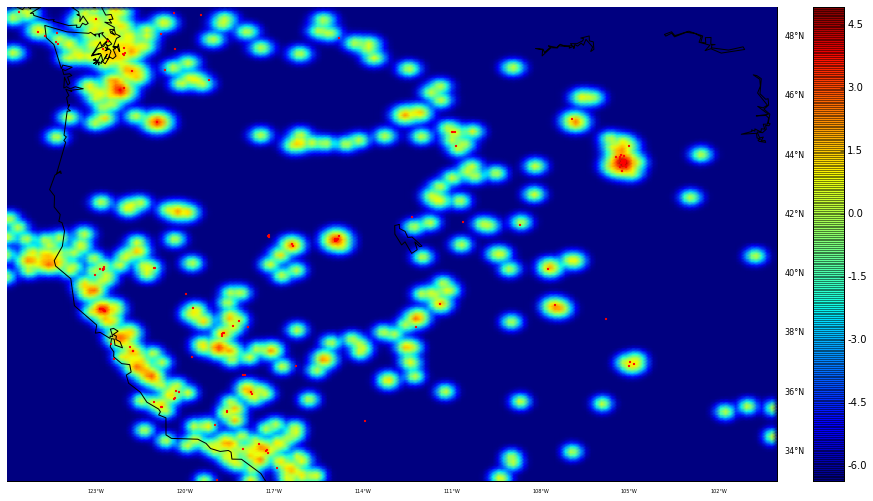

In [33]:
hm = EventHeatmap(f=prior_lp, left_lon=-126, right_lon=-100, top_lat=49, bottom_lat=33, calc=True, n=150)

f = plt.figure(figsize=(15, 15))
ax = plt.gca()
hm.init_bmap(axes=ax, nofillcontinents=True, projection="cyl")
hm.plot_earth()
hm.plot_density(smooth=True)

normed_locations = np.array([hm.normalize_lonlat(*location[:2]) for location in validation_events ])
scplot = hm.bmap.scatter(normed_locations[:, 0], normed_locations[:, 1], 
                         alpha=1.0, s=6, zorder=10,
                         marker=".", color="red")

In [8]:
s = Sigvisa()
sampled = []
for i in range(300):
    lon, lat, depth = s.sigmodel.event_location_prior_sample()
    sampled.append((lon, lat, depth))

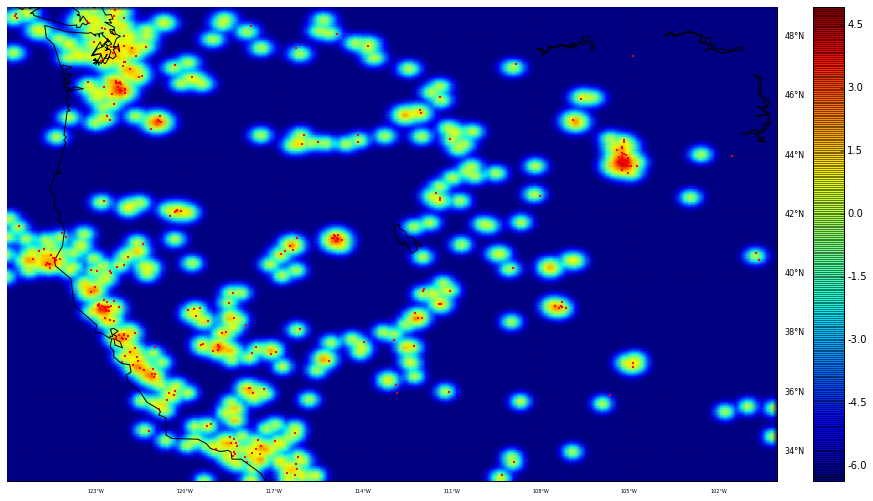

In [9]:
hm = EventHeatmap(f=prior_lp, left_lon=-126, right_lon=-100, top_lat=49, bottom_lat=33, calc=True, n=150)

f = plt.figure(figsize=(15, 15))
ax = plt.gca()
hm.init_bmap(axes=ax, nofillcontinents=True, projection="cyl")
hm.plot_earth()
hm.plot_density(smooth=True)

normed_locations = np.array([hm.normalize_lonlat(*location[:2]) for location in sampled ])
scplot = hm.bmap.scatter(normed_locations[:, 0], normed_locations[:, 1], 
                         alpha=1.0, s=6, zorder=10,
                         marker=".", color="red")

